In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as scikit_learn
import random
pd.options.display.max_columns = 250

In [194]:
df = pd.read_csv('./loc.csv') 
df2 = pd.read_csv('./wrcc.csv')
df3 = pd.read_csv('./dist.csv')
i = 0
while i < 20:
    df.replace((' '*i), np.nan, inplace = True)
    i = i+1
df2.head(8)

#df.drop(index=df.index[0], axis=0)

df = df.join(df3,lsuffix='_other')

In [195]:
rad = []

for ra in df['RAJ2000\n"h:m:s"']:
    rad.append(int(ra[0:2]) / 24 * 360 + int(ra[3:5]) / 24 * 360 / 60 + float(ra[6:10]) / 24 * 360 / 3600)
df['rad'] = rad

dec = []
for de in df['DEJ2000\n"d:m:s"']:
    if de[0] == '-':
        a = -1
    else:
        a = 1
    dec.append((int(de[1:3]) + int(de[4:6]) / 60 + float(de[7:11]) / 3600)*a)
df['decd'] = dec
#df = df.join(df2.set_index('Full'), on='Full',lsuffix='_caller', rsuffix='_other')


In [196]:
df

,Full_other,New,WR_other,Name,GCVS,OName,LS,Aname,"RAJ2000\n""h:m:s""","DEJ2000\n""d:m:s""",r_Pos,GLON\ndeg,GLAT\ndeg,r_FC,Name.1,SpType_other,r_,l__other,vmag\nmag_other,u__other,b-v\nmag_other,u_.1_other,r_vmag,vinf\nkm/s,vinf2\nkm/s,r_vinf,l_.1,Per\nd,n_,Binary,r_Per,Full,WR,SpType,l_,vmag\nmag,u_,b-v\nmag,u_.1,(b-v)0\nmag,Av\nmag,Mv(WR)\nmag,dM\nmag,d\nkpc,z\npc,Note,rad,decd
0,1,NaN,1,NaN,NaN,HD 4004,LS I+64 34,HIP 3415,00 43 28.40,+64 45 35.40,Hip,122.08,1.90,VI,HD 4004,WN4,SS96*,NaN,10.51,NaN,0.51,NaN,Ma84,2100.0,NaN,HS92,NaN,6.1000,", 7.746, 11.68",SB1?,"La83,MS86,MMH98,MG99,Ni00",1,1,WN4,NaN,10.51,NaN,0.51,NaN,-0.15,2.72,-3.51,NaN,1.82,60.0,NaN,10.868333,64.759833
1,2,NaN,2,NaN,NaN,HD 6327,LS I+60 137,HIP 5100,01 05 23.03,+60 25 18.90,Hip,124.65,-2.41,VI,HD 6327,WN2,SS96*,NaN,11.33,NaN,0.13,NaN,Ma84,3200.0,NaN,HS92,NaN,18.5900,", 2.171, long term",VB,"Hip97,MMH98",2,2,WN2,NaN,11.33,NaN,0.13,NaN,-0.30,1.75,-2.42,NaN,2.51,-106.0,*,16.345833,60.421917
2,3,NaN,3,NaN,NaN,HD 9974,LS I+57 24,HIP 7681,01 38 55.63,+58 09 22.70,Hip,129.18,-4.14,VI,HD 9974,WN3+O4,SS96*,NaN,10.70,NaN,-0.06,NaN,Ma84,NaN,NaN,NaN,NaN,46.8500,-0.02,SB2,"MLS86,MS86,SH89,SM89,SS96",3,3,WN3+O4,NaN,10.70,NaN,-0.06,NaN,-0.26,0.82,-3.09,-0.27,5.94,-429.0,*,24.731667,58.156306
3,4,NaN,4,NaN,V493 Per,HD 16523,LS I+56 62,HIP 12527,02 41 11.68,+56 43 49.70,Hip,137.59,-2.98,VI,HD 16523,WC5+?,VI,NaN,10.53,NaN,0.20,NaN,Ma84,1900.0,NaN,KH95,NaN,2.4096,", 10:","SB1, no d.e.l.","MS86,CM89,RC89,SS90,t.w.",4,4,WC5+?,NaN,10.53,NaN,0.20,NaN,-0.27,1.93,-3.34,NaN,2.44,-127.0,*,40.298333,56.730472
4,5,NaN,5,NaN,NaN,HD 17638,LS I+56 77,HIP 13380,02 52 11.66,+56 56 07.10,Hip,138.87,-2.15,VI,HD 17638,WC6,VI,NaN,11.02,NaN,0.47,NaN,Ma84,2100.0,NaN,TC86u,NaN,NaN,NaN,NaN,NaN,5,5,WC6,NaN,11.02,NaN,0.47,NaN,-0.32,3.24,-3.63,NaN,1.91,-72.0,*,43.048333,56.935306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,222,NaN,154,NaN,NaN,HD 213049,LS III+55 79,HIP 110836,22 27 17.82,+56 15 11.80,Hip,103.85,-1.18,VI,HD 213049,WC6,VI,NaN,11.54,NaN,0.36,NaN,Ma84,2050.0,NaN,KH95,NaN,NaN,NaN,NaN,NaN,222,154,WC6,NaN,11.54,NaN,0.36,NaN,-0.29,2.65,-3.31,NaN,2.75,-57.0,NaN,336.824167,56.253278
222,223,NaN,155,NaN,CQ Cep,HD 214419,LS III+56 80,HIP 111633,22 36 53.96,+56 54 21.00,Hip,105.32,-1.29,VI,"HD 214419, CQ Cep",WN6+O9II-Ib,SS96*,NaN,8.75,NaN,0.28,NaN,Ma84,1400.0,NaN,EW94,NaN,1.6412,436,SB2,"SB84,MS86,SM89,MM95,HH97,Hip97,MMH98,NG99a",223,155,WN6+O9II-Ib,NaN,8.75,NaN,0.28,NaN,-0.26,2.22,-2.80,-2.79,2.75,-62.0,*,339.224583,56.905833
223,224,NaN,156,AC+60 38562-0,NaN,NaN,LS III+60 30,HIP 113569,23 00 10.13,+60 55 38.40,Hip,109.82,0.92,VI,AC+60 38562,WN8h+OB?,"SS96,t.w.",NaN,11.09,NaN,0.83,NaN,Ma84,660.0,NaN,CS95b,NaN,6.5000,", 10.05, 15",d.e.l.,"MS86,CM89,MMH98,MMEv98,t.w.",224,156,WN8h+OB?,NaN,11.09,NaN,0.83,NaN,-0.27,4.51,-5.48,0.11,3.56,57.0,*,345.042083,60.927333
224,225,NaN,157,NaN,NaN,HD 219460,LS III+60 55,HIP 114791,23 15 12.41,+60 27 01.90,Hip,111.33,-0.24,VI,HD 219460,WN5 (+B1II),SS96*,NaN,9.91,NaN,0.46,NaN,Ma84,1500.0,NaN,HK95,NaN,1.7860,", 2.032",VB,"HH88,Hip97,MMH98,NG99a",225,157,WN5 (+B1II VB),NaN,9.91,NaN,0.46,NaN,-0.25,2.93,-4.07,-1.31,3.39,-14.0,*,348.801667,60.450528


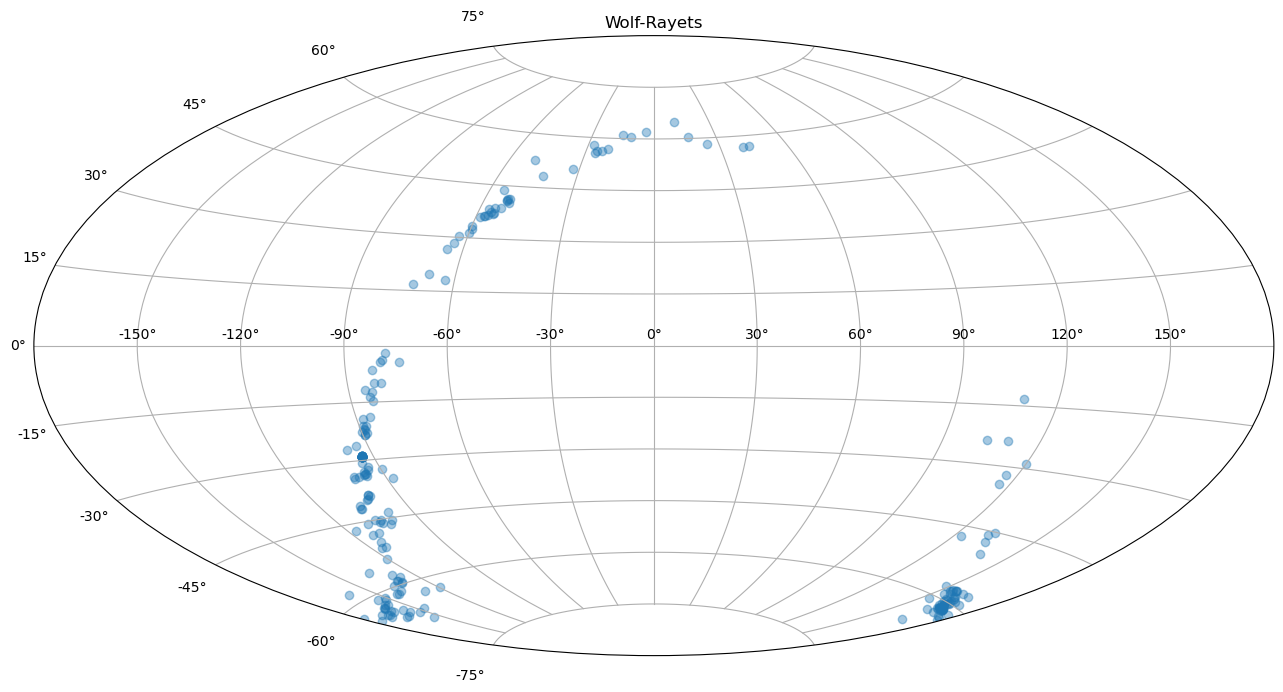

In [197]:
import matplotlib as mpl
df['rad']=df['rad']/180*np.pi
rar=[]
for r in df['rad']:
    if r > np.pi:
        r = r - 2* np.pi
    rar.append(r)


mpl.rcParams['agg.path.chunksize'] = 10000
plt.figure (figsize = (16, 8.4))
plt.subplot (projection = "aitoff")
plt.title ("Wolf-Rayets")
plt.scatter(rar, df['decd']/180*np.pi,marker='o', alpha = 0.4)
plt.grid (True)

plt.show()

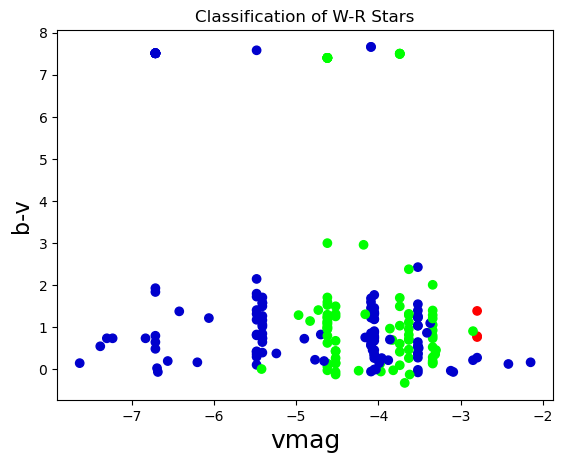

In [198]:
type1 = df['SpType'].tolist()
color = []
spec = []
count = [0,0]
for t in type1:
    if t[1] == 'N':
        color.append('#0000CD')
        spec.append(2)
        
    elif t[1] == 'C':
        color.append('#00FF00')
        spec.append(1)
        
    elif t[1] == 'O':
        color.append('#FF0000')
        spec.append(0)
plt.scatter(df['Mv(WR)\nmag'], df['b-v\nmag'].map(float), c = color)
plt.title('Classification of W-R Stars')
plt.xlabel('vmag', fontsize=18)
plt.ylabel('b-v', fontsize=16)

plt.show()
df['spec']= spec


In [199]:
df1 = df[['Mv(WR)\nmag','b-v\nmag','vinf\nkm/s','vmag\nmag_other' ]].dropna().map(float)

X = df1.values[:]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 225
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mv(WR)
mag      136 non-null    float64
 1   b-v
mag         136 non-null    float64
 2   vinf
km/s       136 non-null    float64
 3   vmag
mag_other  136 non-null    float64
dtypes: float64(4)
memory usage: 5.3 KB


In [200]:
from sklearn.cluster import KMeans
clusterNum = 2
k_means = KMeans(n_clusters = clusterNum)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1
 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1]


In [201]:
df1["Clus_km"] = labels
df1.head(5)

,Mv(WR)\nmag,b-v\nmag,vinf\nkm/s,vmag\nmag_other,Clus_km
0,-3.51,0.51,2100.0,10.51,0
1,-2.42,0.13,3200.0,11.33,0
3,-3.34,0.20,1900.0,10.53,0
4,-3.63,0.47,2100.0,11.02,0
5,-3.52,-0.07,1800.0,6.94,0


In [202]:
df1.groupby('Clus_km')

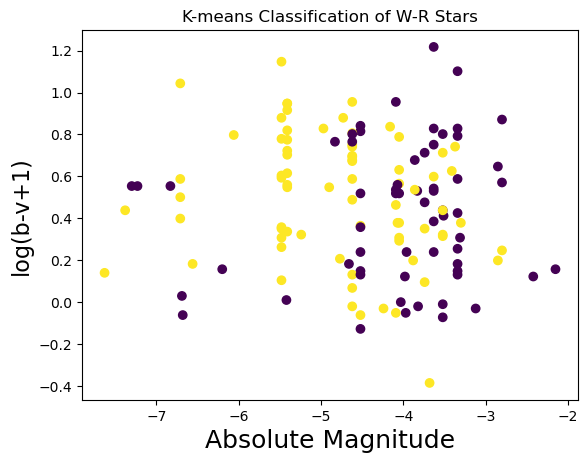

In [203]:
#area = np.pi * ( X[:, 3])**2 / 3 



plt.scatter(X[:, 0], np.log(X[:, 1]+1), c=labels.astype(float))
plt.title('K-means Classification of W-R Stars')
plt.xlabel('Absolute Magnitude', fontsize=18)
plt.ylabel('log(b-v+1)', fontsize=16)

plt.show()

In [204]:

df123= df[['Mv(WR)\nmag', 'SpType','b-v\nmag','vinf\nkm/s','vmag\nmag_other']].dropna()

type1 = df123['SpType'].tolist()
color = []
spec = []
for t in type1:
    if t[1] == 'N':
        color.append('#0000CD')
        spec.append(0)
    elif t[1] == 'C':
        color.append('#00FF00')
        spec.append(1)
    elif t[1] == 'O':
        color.append('#00FF00')
        spec.append(0)
df123['spec']= spec
df12 = df123.query("spec == 1")
c = 1
df1234 = df123.query("spec == 0")
for j in range(0,61):
    d = df1234.iloc[j]
    df12 = pd.concat([df12,d], ignore_index=True)
 




In [211]:



df12

,Mv(WR)\nmag,b-v\nmag,vinf\nkm/s,vmag\nmag_other,spec,0
0,-3.34,0.20,1900.0,10.53,1.0,NaN
1,-3.63,0.47,2100.0,11.02,1.0,NaN
2,-3.68,-0.32,1450.0,1.74,1.0,NaN
3,-3.63,0.82,1700.0,13.78,1.0,NaN
4,-3.98,0.13,1900.0,9.42,1.0,NaN
...,...,...,...,...,...,...
422,NaN,NaN,NaN,NaN,NaN,WN6
423,NaN,NaN,NaN,NaN,NaN,0.2
424,NaN,NaN,NaN,NaN,NaN,2050.0
425,NaN,NaN,NaN,NaN,NaN,8.23


In [218]:


df12.dropna()

,Mv(WR)\nmag,b-v\nmag,vinf\nkm/s,vmag\nmag_other,spec
0,-3.34,0.20,1900.0,10.53,1.0
1,-3.63,0.47,2100.0,11.02,1.0
2,-3.68,-0.32,1450.0,1.74,1.0
3,-3.63,0.82,1700.0,13.78,1.0
4,-3.98,0.13,1900.0,9.42,1.0
...,...,...,...,...,...
56,-3.34,1.21,2750.0,11.95,1.0
57,-3.34,2.01,2400.0,15.49,1.0
58,-3.63,2.38,2700.0,13.91,1.0
59,-3.34,0.53,2600.0,13.47,1.0


In [219]:
from sklearn import metrics
df12.drop('SpType', axis=1, inplace=True)
X = df12.values[:]
print(metrics.accuracy_score(df12['spec'], k_means.predict(X)))

KeyError: "['SpType'] not found in axis"

In [ ]:

y = df12['spec']
X = df12[['Mv(WR)\nmag','b-v\nmag','vinf\nkm/s', 'spec','vmag\nmag_other']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state = 0)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)
neigh.score(X_test,y_test)


0.7142857142857143

In [ ]:

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test,  neigh.predict(X_test)))

Train set Accuracy:  0.7217391304347827
Test set Accuracy:  0.7142857142857143


In [ ]:
neigh.predict(X_test)

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

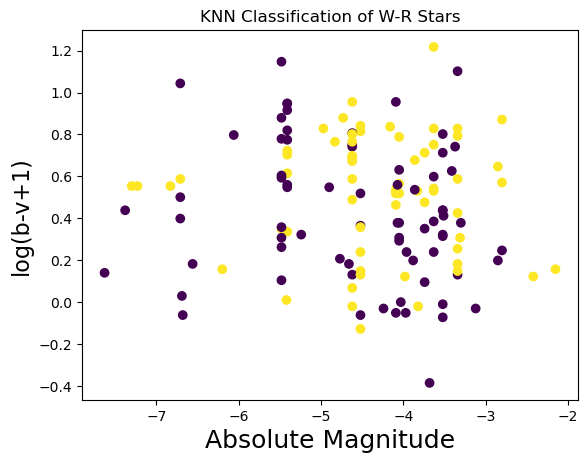

In [ ]:

plt.scatter(X['Mv(WR)\nmag'], np.log(X['b-v\nmag']+1), c = neigh.predict(X))
plt.title('KNN Classification of W-R Stars')

plt.xlabel('Absolute Magnitude', fontsize=18)
plt.ylabel('log(b-v+1)', fontsize=16)

plt.show()

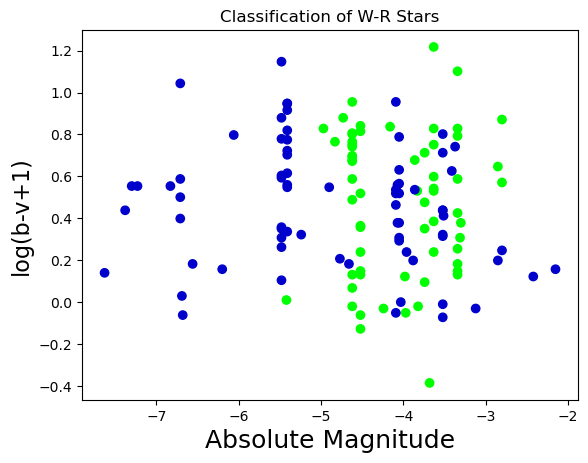

In [ ]:
X = df12[['Mv(WR)\nmag','b-v\nmag','vinf\nkm/s', 'spec','vmag\nmag_other']]

plt.scatter(X['Mv(WR)\nmag'], np.log(X['b-v\nmag']+1), c = color)
plt.title('Classification of W-R Stars')
plt.xlabel('Absolute Magnitude', fontsize=18)
plt.ylabel('log(b-v+1)', fontsize=16)
plt.show()

In [ ]:
Ks = 19
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.71428571, 0.76190476, 0.61904762, 0.66666667, 0.61904762,
       0.76190476, 0.71428571, 0.76190476, 0.71428571, 0.76190476,
       0.61904762, 0.66666667, 0.66666667, 0.66666667, 0.61904762,
       0.66666667, 0.61904762, 0.66666667])

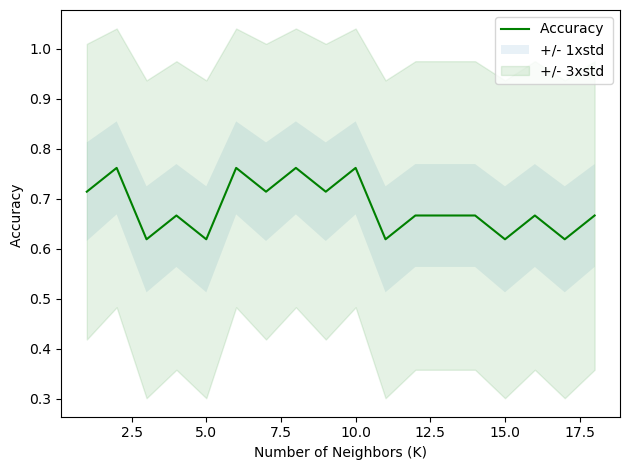

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
y = df12['spec']
X = df12[['Mv(WR)\nmag','b-v\nmag','vinf\nkm/s']]
i=0
acc = []
all_acc = 0
Ks = 25

while i <500:
    acc = []
    for n in range(1,Ks):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.15, random_state=i)
        #Train Model and Predict  
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        neigh.fit(X_train,y_train)
        acc.append(neigh.score(X_test, y_test)) 
    all_acc = all_acc + max(acc)
    i = i+1
all_acc/500


    

0.7542857142857126

In [ ]:
0.8471574468084831

0.8471574468084831

In [ ]:
df['Mv(WR)\nmag'].describe()

count    216.000000
mean      -4.510741
std        1.112730
min       -7.630000
25%       -5.410000
50%       -4.090000
75%       -3.630000
max       -2.150000
Name: Mv(WR)\nmag, dtype: float64

In [ ]:
df['vinf\nkm/s'].describe()

count     141.000000
mean     1721.702128
std       714.197809
min        90.000000
25%      1210.000000
50%      1600.000000
75%      2050.000000
max      5000.000000
Name: vinf\nkm/s, dtype: float64

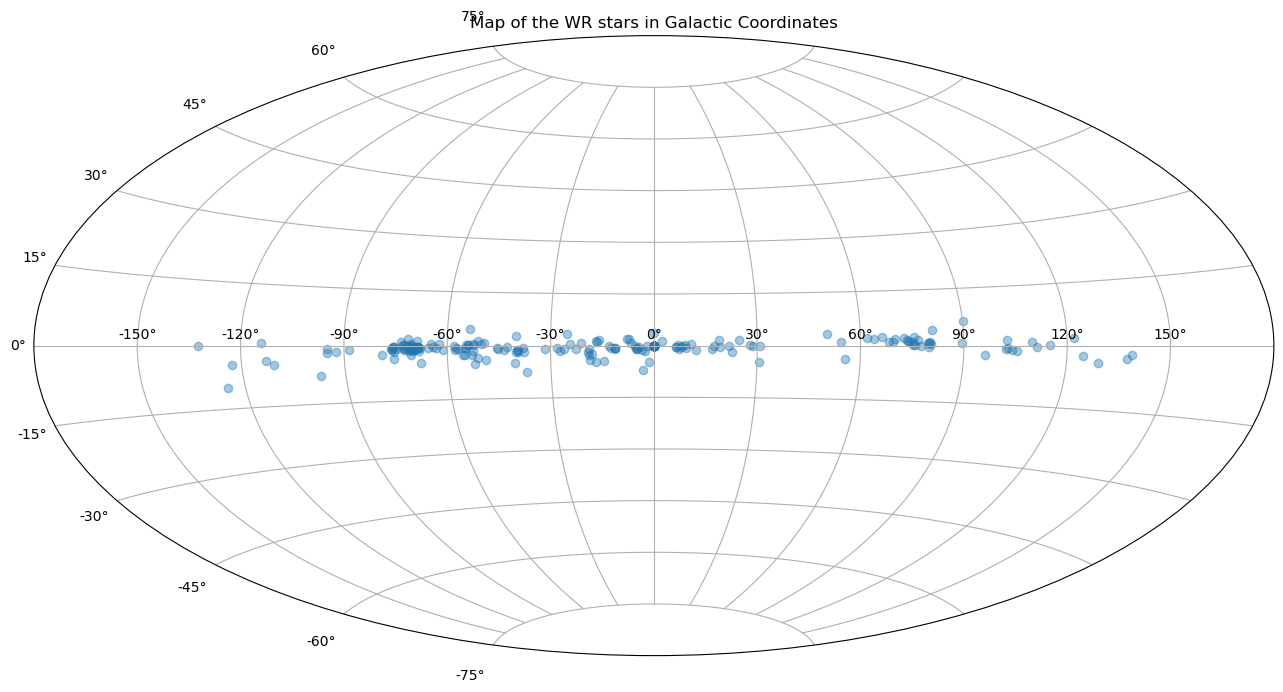

In [ ]:

df['GLON\ndeg']=df['GLON\ndeg']/180*np.pi
longs=[]
for longr in df['GLON\ndeg']:
    if longr > np.pi:
        longr = longr - 2* np.pi
    longs.append(longr)

plt.figure (figsize = (16, 8.4))
plt.subplot (projection = "aitoff")
plt.title ("Map of the WR stars in Galactic Coordinates")
plt.scatter (longs, df['GLAT\ndeg']/180*np.pi,marker='o',  alpha = 0.4)
plt.grid (True)

plt.show()

In [ ]:
y = df12['spec']
X = df12[['Mv(WR)\nmag','b-v\nmag','vinf\nkm/s' ]]
x = df1.values[:]
from sklearn.model_selection import cross_val_score

scores = cross_val_score(k_means.fit(X), X, y, cv=10)

In [ ]:
scores

array([-2791857.34911654, -4455694.41064357, -2494955.96458943,
       -2066549.71260589, -1401374.58312384, -1118530.9089101 ,
       -6084165.09347767, -1416999.18749136, -9252084.74542351,
       -2780375.79120514])

In [ ]:
scores.mean()

-3386258.7746587037

In [ ]:
c = k_means.fit(x)
c

KMeans(n_clusters=2)

0.0008709607965472488


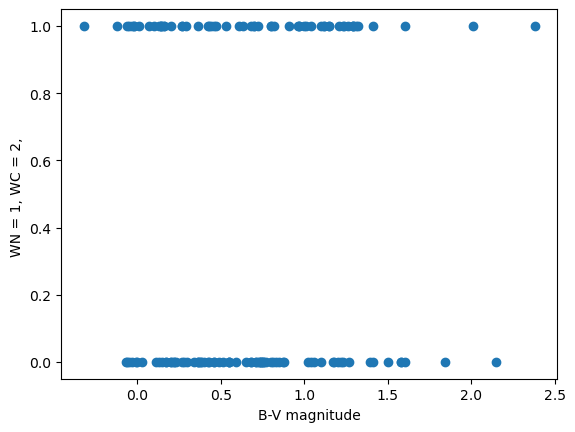

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(np.array(df12['b-v\nmag']).reshape(-1, 1), np.array(df12['spec']).reshape(-1, 1))
diabetes_y_pred = regr.predict(np.array(df12['b-v\nmag']).reshape(-1, 1))
print(r2_score(np.array(df12['spec']).reshape(-1, 1), diabetes_y_pred))
plt.scatter(df12['b-v\nmag'], df12['spec'])
plt.ylabel('WN = 1, WC = 2, ')
plt.xlabel('B-V magnitude')
plt.show()

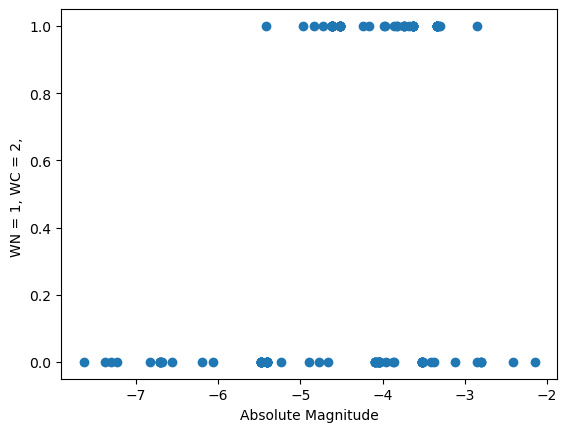

In [ ]:
plt.scatter(df12['Mv(WR)\nmag'], df12['spec'])
plt.ylabel('WN = 1, WC = 2, ')
plt.xlabel('Absolute Magnitude')
plt.show()

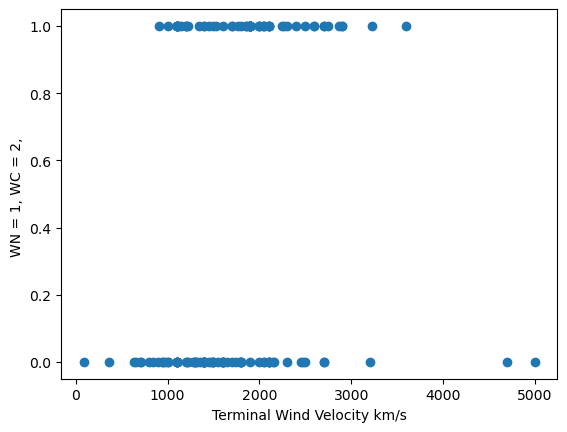

In [ ]:
plt.scatter(df12['vinf\nkm/s'], df12['spec'])
plt.ylabel('WN = 1, WC = 2, ')
plt.xlabel('Terminal Wind Velocity km/s')
plt.show()

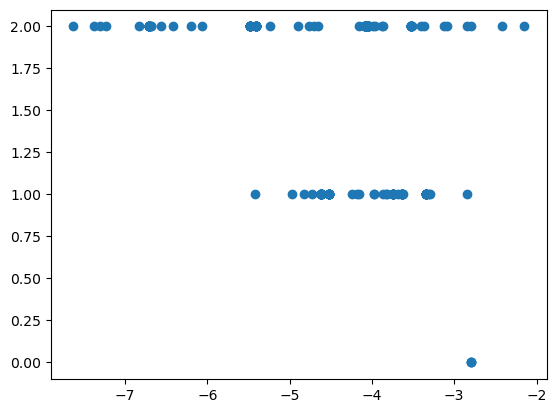

In [ ]:
plt.scatter(df['Mv(WR)\nmag'], df['spec'])
plt.show()

In [ ]:
acc

[0.7619047619047619,
 0.6666666666666666,
 0.6666666666666666,
 0.6190476190476191,
 0.5714285714285714,
 0.5238095238095238,
 0.6190476190476191,
 0.7142857142857143,
 0.7142857142857143,
 0.6190476190476191,
 0.6666666666666666,
 0.7142857142857143,
 0.6190476190476191,
 0.6190476190476191,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714]

In [ ]:
for n in range(1,Ks):
        acc = []
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.15, random_state=i)
        #Train Model and Predict  
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        neigh.fit(X_train,y_train)
        acc.append(neigh.score(X_test, y_test)) 

In [ ]:
acc

[0.47619047619047616]

In [ ]:
df.head()


,Full_other,New,WR_other,Name,GCVS,OName,LS,Aname,"RAJ2000\n""h:m:s""","DEJ2000\n""d:m:s""",r_Pos,GLON\ndeg,GLAT\ndeg,r_FC,Name.1,SpType_other,r_,l__other,vmag\nmag_other,u__other,b-v\nmag_other,u_.1_other,r_vmag,vinf\nkm/s,vinf2\nkm/s,r_vinf,l_.1,Per\nd,n_,Binary,r_Per,Full,WR,SpType,l_,vmag\nmag,u_,b-v\nmag,u_.1,(b-v)0\nmag,Av\nmag,Mv(WR)\nmag,dM\nmag,d\nkpc,z\npc,Note,rad,decd,spec
0,1,NaN,1,NaN,NaN,HD 4004,LS I+64 34,HIP 3415,00 43 28.40,+64 45 35.40,Hip,2.130698,1.90,VI,HD 4004,WN4,SS96*,NaN,10.51,NaN,0.51,NaN,Ma84,2100.0,NaN,HS92,NaN,6.1000,", 7.746, 11.68",SB1?,"La83,MS86,MMH98,MG99,Ni00",1,1,WN4,NaN,10.51,NaN,0.51,NaN,-0.15,2.72,-3.51,NaN,1.82,60.0,NaN,0.189688,64.759833,2
1,2,NaN,2,NaN,NaN,HD 6327,LS I+60 137,HIP 5100,01 05 23.03,+60 25 18.90,Hip,2.175553,-2.41,VI,HD 6327,WN2,SS96*,NaN,11.33,NaN,0.13,NaN,Ma84,3200.0,NaN,HS92,NaN,18.5900,", 2.171, long term",VB,"Hip97,MMH98",2,2,WN2,NaN,11.33,NaN,0.13,NaN,-0.30,1.75,-2.42,NaN,2.51,-106.0,*,0.285289,60.421917,2
2,3,NaN,3,NaN,NaN,HD 9974,LS I+57 24,HIP 7681,01 38 55.63,+58 09 22.70,Hip,2.254616,-4.14,VI,HD 9974,WN3+O4,SS96*,NaN,10.70,NaN,-0.06,NaN,Ma84,NaN,NaN,NaN,NaN,46.8500,-0.02,SB2,"MLS86,MS86,SH89,SM89,SS96",3,3,WN3+O4,NaN,10.70,NaN,-0.06,NaN,-0.26,0.82,-3.09,-0.27,5.94,-429.0,*,0.431649,58.156306,2
3,4,NaN,4,NaN,V493 Per,HD 16523,LS I+56 62,HIP 12527,02 41 11.68,+56 43 49.70,Hip,2.401399,-2.98,VI,HD 16523,WC5+?,VI,NaN,10.53,NaN,0.20,NaN,Ma84,1900.0,NaN,KH95,NaN,2.4096,", 10:","SB1, no d.e.l.","MS86,CM89,RC89,SS90,t.w.",4,4,WC5+?,NaN,10.53,NaN,0.20,NaN,-0.27,1.93,-3.34,NaN,2.44,-127.0,*,0.703339,56.730472,1
4,5,NaN,5,NaN,NaN,HD 17638,LS I+56 77,HIP 13380,02 52 11.66,+56 56 07.10,Hip,2.423739,-2.15,VI,HD 17638,WC6,VI,NaN,11.02,NaN,0.47,NaN,Ma84,2100.0,NaN,TC86u,NaN,NaN,NaN,NaN,NaN,5,5,WC6,NaN,11.02,NaN,0.47,NaN,-0.32,3.24,-3.63,NaN,1.91,-72.0,*,0.751335,56.935306,1


In [ ]:
df12.describe()


,Mv(WR)\nmag,b-v\nmag,vinf\nkm/s,vmag\nmag_other,spec
count,136.000000,136.000000,136.000000,136.000000,136.000000
mean,-4.476838,0.677574,1722.647059,11.555956,0.448529
std,1.106718,0.521929,720.285165,2.612587,0.499182
min,-7.630000,-0.320000,90.000000,1.740000,0.000000
25%,-5.410000,0.260000,1207.500000,9.992500,0.000000
50%,-4.380000,0.680000,1600.000000,11.815000,0.000000
75%,-3.630000,1.045000,2062.500000,13.542500,1.000000
max,-2.150000,2.380000,5000.000000,15.900000,1.000000


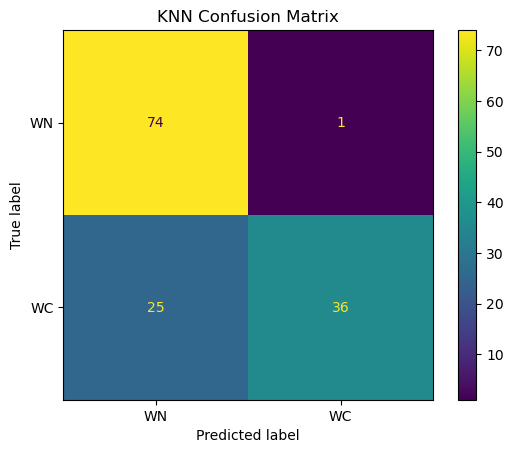

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.15, random_state=0)

neigh = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
yhat=neigh.predict(X)
confusion_matrix = metrics.confusion_matrix(y, yhat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["WN", "WC"])

cm_display.plot()
plt.title ("KNN Confusion Matrix")
plt.show()

In [ ]:
Ks = 19
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X)
    mean_acc[n-1] = metrics.accuracy_score(y, yhat)

    
    std_acc[n-1]=np.std(yhat==y)/np.sqrt(yhat.shape[0])

mean_acc

array([0.95588235, 0.80882353, 0.79411765, 0.74264706, 0.72058824,
       0.70588235, 0.71323529, 0.72794118, 0.71323529, 0.69852941,
       0.69117647, 0.72058824, 0.67647059, 0.66176471, 0.67647059,
       0.66911765, 0.66176471, 0.66176471])

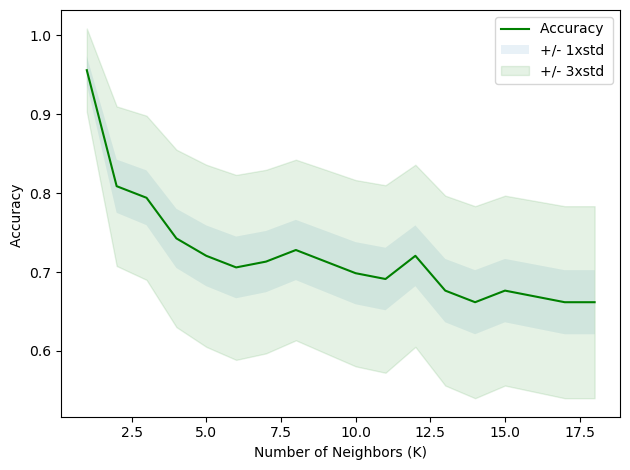

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
clusterNum = 2
k_means = KMeans(n_clusters = clusterNum)
k_means.fit(X_train)
labels = k_means.labels_
print(labels)

[0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1
 1 1 1 1]


In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y, k_means.predict(X)))

0.39705882352941174


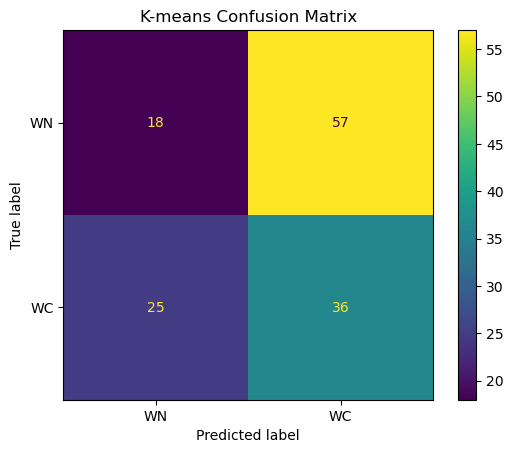

[135, 88]


In [ ]:
confusion_matrix = metrics.confusion_matrix(y, k_means.predict(X))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["WN", "WC"])

cm_display.plot()
plt.title ("K-means Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd

# dictionary of lists
dict = {'name': ["aparna", "pankaj", "sudhir", "Geeku"],
        'degree': ["MBA", "BCA", "M.Tech", "MBA"],
        'score': [90, 40, 80, 98]}

# creating a dataframe from a dictionary
df = pd.DataFrame(dict)

# iterating over rows using iterrows() function
for i, j in df.iterrows():
    print(i)
    print()

SyntaxError: '(' was never closed (3009158342.py, line 13)

In [ ]:
df123= df[['Mv(WR)\nmag', 'SpType','b-v\nmag','vinf\nkm/s','vmag\nmag_other']].dropna()

type1 = df123['SpType'].tolist()
color = []
spec = []
count =[0,0]
for t in type1:
    if t[1] == 'N':
        color.append('#0000CD')
        spec.append(0)
        count[0] +=1
    elif t[1] == 'C':
        color.append('#00FF00')
        spec.append(1)
        count[1] +=1
    elif t[1] == 'O':
        color.append('#00FF00')
        spec.append(0)
count


[73, 61]

In [ ]:
for j in range(0,61):
    d = df1234.iloc[j]
    df12 = pd.concat([df12,d], ignore_index=True)
    print(d)

Mv(WR)\nmag         -3.51
SpType                WN4
b-v\nmag             0.51
vinf\nkm/s         2100.0
vmag\nmag_other     10.51
spec                    0
Name: 0, dtype: object
Mv(WR)\nmag         -2.42
SpType                WN2
b-v\nmag             0.13
vinf\nkm/s         3200.0
vmag\nmag_other     11.33
spec                    0
Name: 1, dtype: object
Mv(WR)\nmag         -3.52
SpType                WN4
b-v\nmag            -0.07
vinf\nkm/s         1800.0
vmag\nmag_other      6.94
spec                    0
Name: 5, dtype: object
Mv(WR)\nmag         -3.52
SpType                WN4
b-v\nmag             0.38
vinf\nkm/s         1600.0
vmag\nmag_other     11.68
spec                    0
Name: 6, dtype: object
Mv(WR)\nmag                   -2.85
SpType             WN5ha (+A2V, VB)
b-v\nmag                       0.22
vinf\nkm/s                   1475.0
vmag\nmag_other               11.08
spec                              0
Name: 10, dtype: object
Mv(WR)\nmag         -5.48
SpType            

In [ ]:
df12

,Mv(WR)\nmag,b-v\nmag,vinf\nkm/s,vmag\nmag_other,spec,0
0,-3.34,0.20,1900.0,10.53,1.0,NaN
1,-3.63,0.47,2100.0,11.02,1.0,NaN
2,-3.68,-0.32,1450.0,1.74,1.0,NaN
3,-3.63,0.82,1700.0,13.78,1.0,NaN
4,-3.98,0.13,1900.0,9.42,1.0,NaN
...,...,...,...,...,...,...
425,NaN,NaN,NaN,NaN,NaN,WN6
426,NaN,NaN,NaN,NaN,NaN,0.2
427,NaN,NaN,NaN,NaN,NaN,2050.0
428,NaN,NaN,NaN,NaN,NaN,8.23
